# Iris Classification


##1.  Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

##2. Load Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/My Machine Learning/CBTCIP/Iris Flower - Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#3.Data Checks to Perform

1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of the dataset
6. Check various categories present in the different categorical columns

In [ ]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Check statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Check Missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Check Duplicates
df.duplicated().sum()

0

In [ ]:
#Check the number of unique values of each column
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 4.Data Visualization

In [ ]:
plt.style.use('Solarize_Light2')
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

In [ ]:
species=df.groupby('Species').size().reset_index().rename(columns={0:'count'})


In [ ]:
fig=px.pie(species,values='count',names='Species',labels=species['Species'],title='Distribution of Species',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',textfont_size=20)
fig.show()

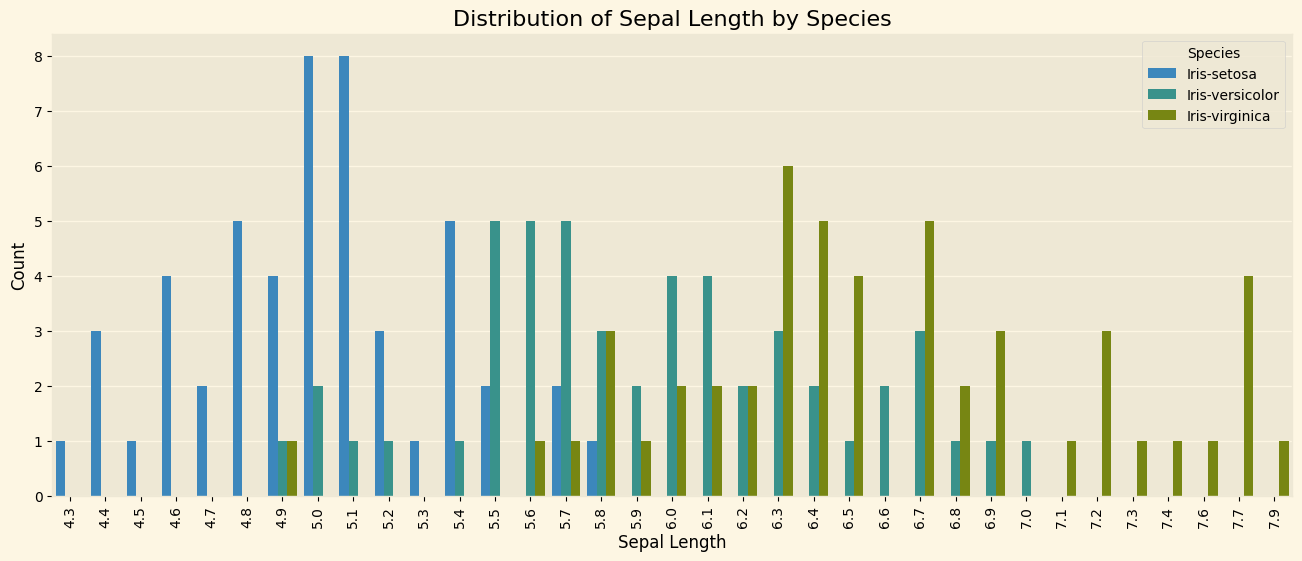

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='SepalLengthCm', hue='Species', data=df)
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Distribution of Sepal Length by Species')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

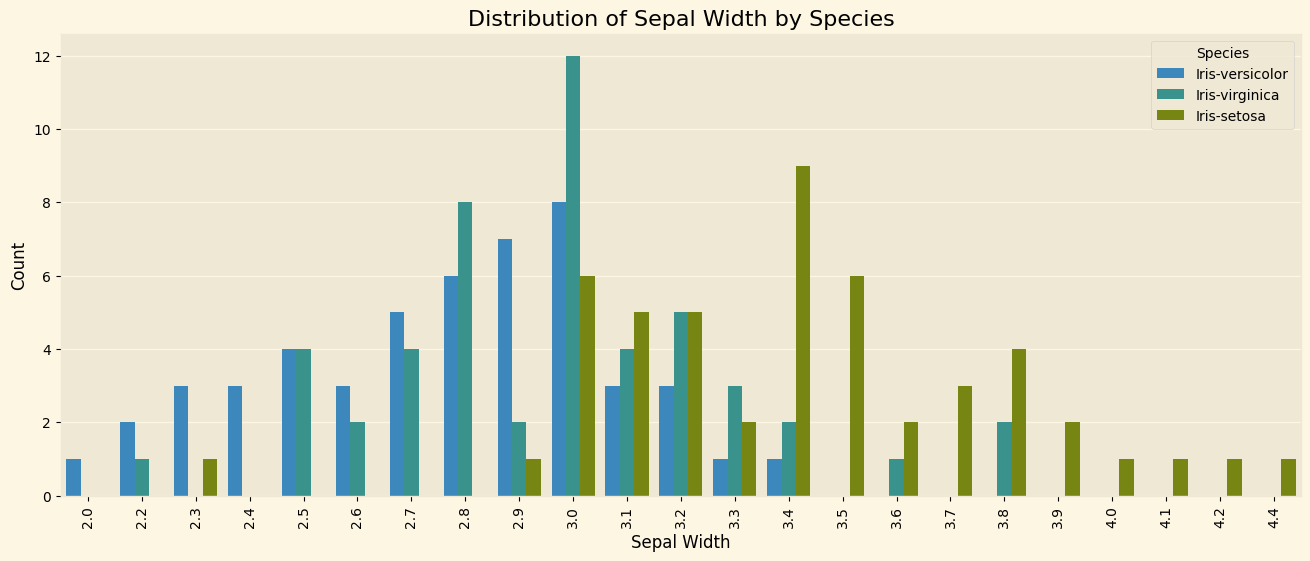

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='SepalWidthCm', hue='Species', data=df)
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.title('Distribution of Sepal Width by Species')
plt.xticks(rotation='vertical')
plt.show()

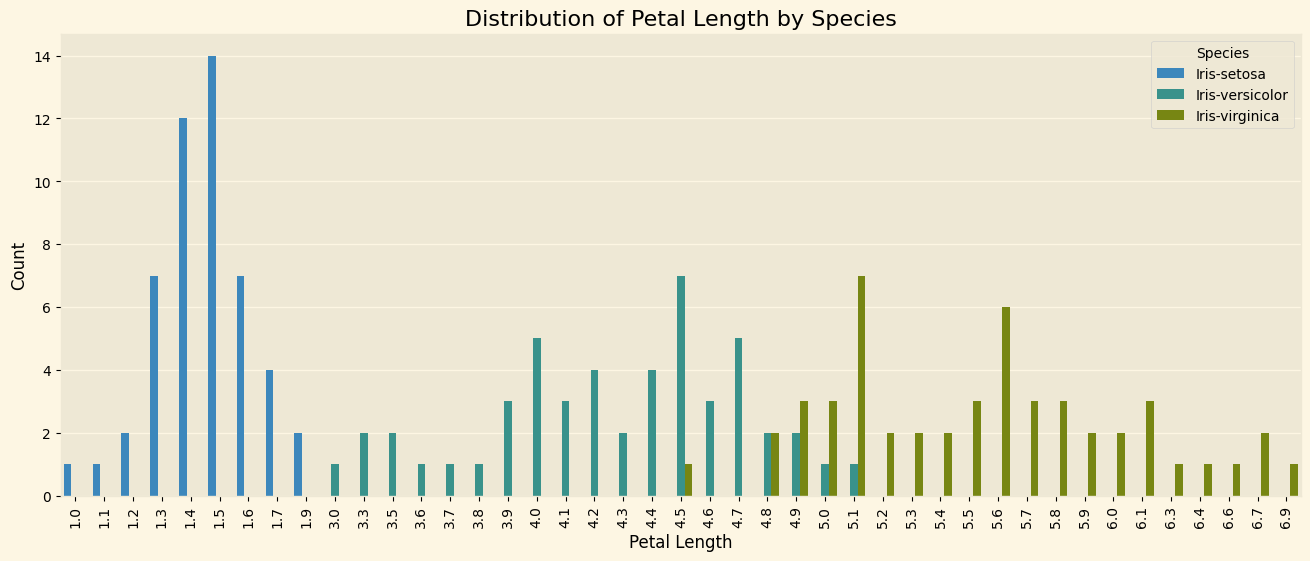

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='PetalLengthCm', hue='Species', data=df)
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Distribution of Petal Length by Species')
plt.xticks(rotation='vertical')
plt.show()

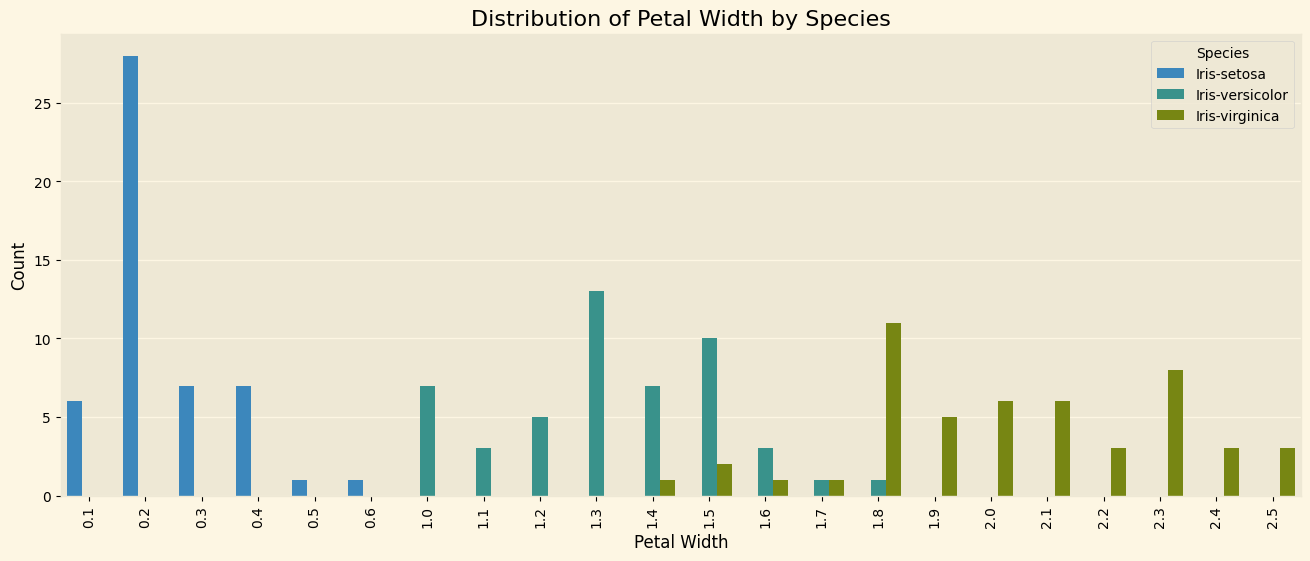

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='PetalWidthCm', hue='Species', data=df)
plt.xlabel('Petal Width')
plt.ylabel('Count')
plt.title('Distribution of Petal Width by Species')
plt.xticks(rotation='vertical')
plt.show()

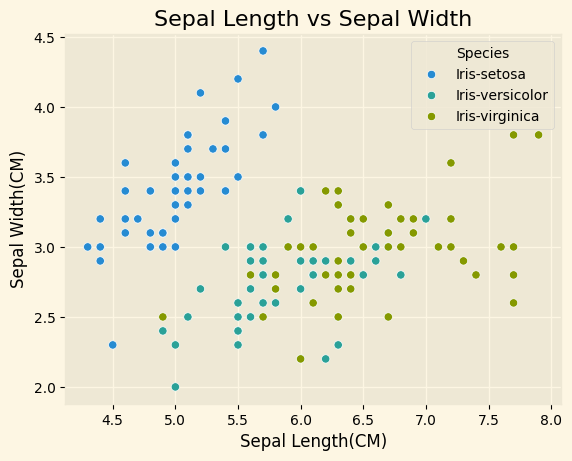

In [ ]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
# df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8)
plt.xlabel('Sepal Length(CM)')
plt.ylabel('Sepal Width(CM)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

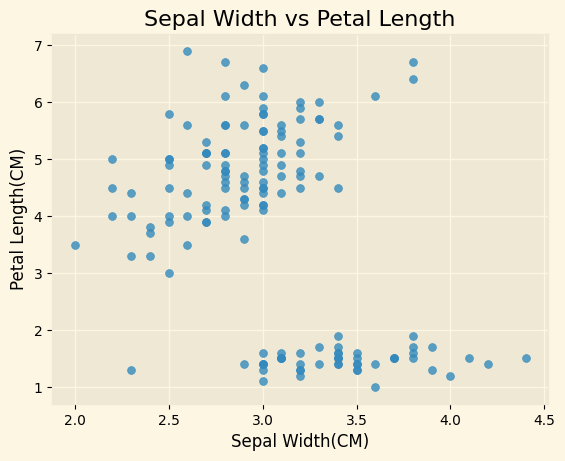

In [ ]:
df.plot(kind='scatter', x='SepalWidthCm', y='PetalLengthCm', s=32, alpha=.8)
plt.xlabel('Sepal Width(CM)')
plt.ylabel('Petal Length(CM)')
plt.title('Sepal Width vs Petal Length')
plt.show()

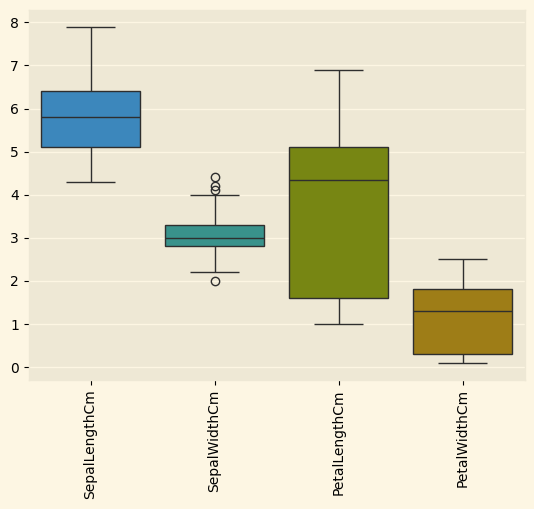

In [ ]:
sns.boxplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(20, 20))
fig = px.scatter_3d(df, x='SepalLengthCm', y='PetalWidthCm', z='PetalLengthCm', color="Species",title='3D Scatter Plot of Iris Dataset')
fig.show()

<Figure size 2000x2000 with 0 Axes>

In [ ]:
x=df.drop('Species',axis=1)
y=df['Species']

# 5.Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

# 6.Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 7.Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


#**Conclusion:**

we explored several classification models on the Iris dataset, a well-known dataset in the machine learning community. The steps included:

1. **Exploratory Data Analysis (EDA):** Understanding the data distribution and relationships between features.
2. **Preprocessing:** Preparing the data for modeling by handling missing values, encoding categorical variables, and feature scaling.
3.**Modeling:** Implementing and evaluating various classification models including Logistic Regression, KNN, Decision Tree, Random Forest, and SVM.

#Future Work:

1. **Hyperparameter Tuning**: Further optimize the models by tuning their hyperparameters using techniques like Grid Search or Random Search.
2. **Feature Engineering:** Experiment with creating new features or transforming existing ones to improve model performance.
3. **Advanced Models:** Explore more advanced models such as Gradient Boosting Machines (GBM) or Neural Networks.